<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/lectures/class_06_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
datawage <- read.csv("https://github.com/tsvoronos/API202-students/blob/f3f34cd64a4f98b4fe6507805e9579f5323f1b9a/data/gap2023.csv?raw=1")


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(datawage)

,age,salary,hours,weeks,educ,immigrant,test_score
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,15,200,15,6,7,0,-1.0868942
2,15,100,5,6,7,0,-1.2553779
3,16,200,15,4,12,0,-1.6225437
4,16,2500,25,10,8,0,-1.5513771
5,16,2000,30,8,9,1,0.8647647
6,16,100,2,6,8,0,-0.7367393


In [12]:
datawage <- datawage %>% mutate(imm_educ = immigrant*educ)
datawage <- datawage %>% mutate(datawage, wage = salary/weeks/hours)

In [13]:
summary(lm(wage ~ educ, data = datawage))


Call:
lm(formula = wage ~ educ, data = datawage)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.811  -5.195  -1.496   3.221  64.150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.91523    1.30692  -3.761  0.00018 ***
educ         1.32329    0.09774  13.538  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.157 on 948 degrees of freedom
Multiple R-squared:  0.162,	Adjusted R-squared:  0.1611 
F-statistic: 183.3 on 1 and 948 DF,  p-value: < 2.2e-16


In [14]:
summary(lm(wage ~ educ + immigrant, data = datawage))


Call:
lm(formula = wage ~ educ + immigrant, data = datawage)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.970  -4.930  -1.291   3.210  61.991 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.82038    1.27732  -2.991  0.00285 ** 
educ         1.38586    0.09528  14.545  < 2e-16 ***
immigrant   -3.93596    0.51616  -7.626  5.9e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.922 on 947 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2088 
F-statistic: 126.2 on 2 and 947 DF,  p-value: < 2.2e-16


In [15]:
summary(lm(wage ~ educ + immigrant +imm_educ, data = datawage))


Call:
lm(formula = wage ~ educ + immigrant + imm_educ, data = datawage)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.557  -4.991  -1.446   3.234  61.404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.6468     1.6313  -3.462 0.000561 ***
educ          1.5278     0.1237  12.352  < 2e-16 ***
immigrant     0.6364     2.5967   0.245 0.806440    
imm_educ     -0.3479     0.1936  -1.797 0.072716 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.913 on 946 degrees of freedom
Multiple R-squared:  0.2132,	Adjusted R-squared:  0.2107 
F-statistic: 85.43 on 3 and 946 DF,  p-value: < 2.2e-16


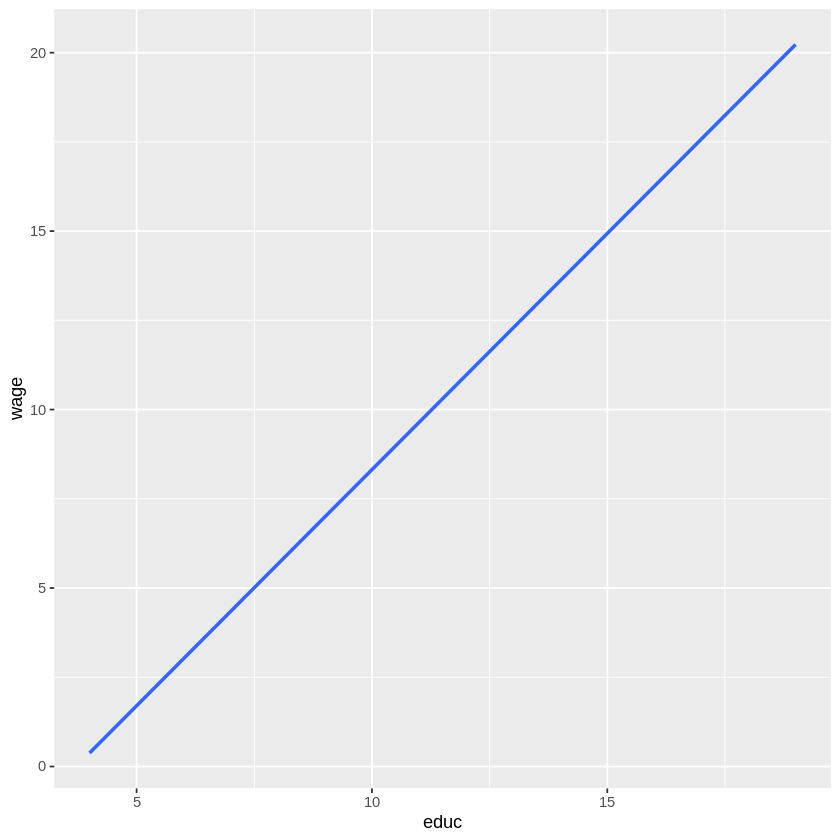

In [22]:
ggplot(datawage, aes(x = educ, y = wage)) + geom_smooth(method = "lm", se = F, formula=y~x)